# Whelks and lobsters -- context operator

## The system

In [57]:
R.<x,y> = QQ[]

In [2]:
from ulbc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

In [4]:
v3 = [RIF(1,1.1), RIF(4,5)]

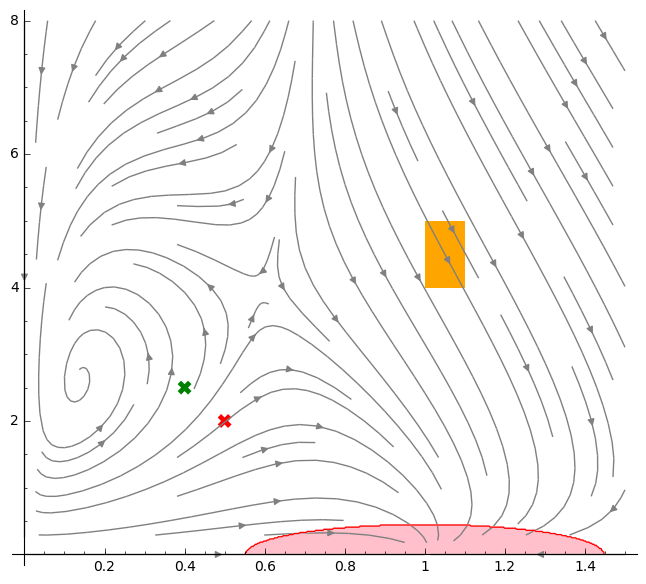

In [58]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8), color='grey')\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.5),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()

## Simple signal

In [6]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

Computed 501 flowpipes in 7.31362915039 sec
Prepared for plotting in 3.95101499557 sec
domain = [0.00000000000000000 .. 5.0000000000000000]
roots = [[1.4278780504788846 .. 2.6199999999999886]]
  J  = [0.00000000000000000 .. 1.4278780504788847]
f(J) = [-0.30143396690184954 .. 25.180516586224702]
  J  = [2.6199999999999885 .. 5.0000000000000000]
f(J) = [-0.35271263287245214 .. 0.085166001459254557]
Monitored signal 0.781062841415 sec


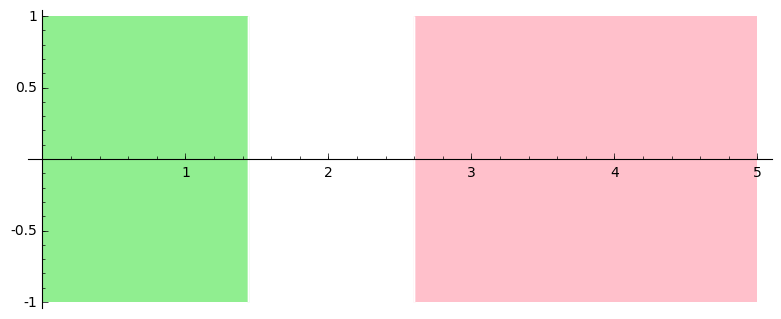

In [7]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5)
sig.plot()

In [8]:
reach = Reach(vf, v3, 10,
              order=5, step=0.01,
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7)

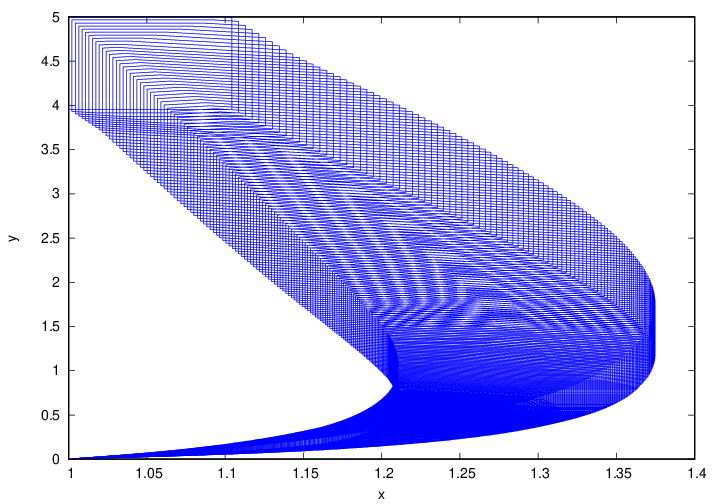

In [9]:
reach.wplot('x', 'y')

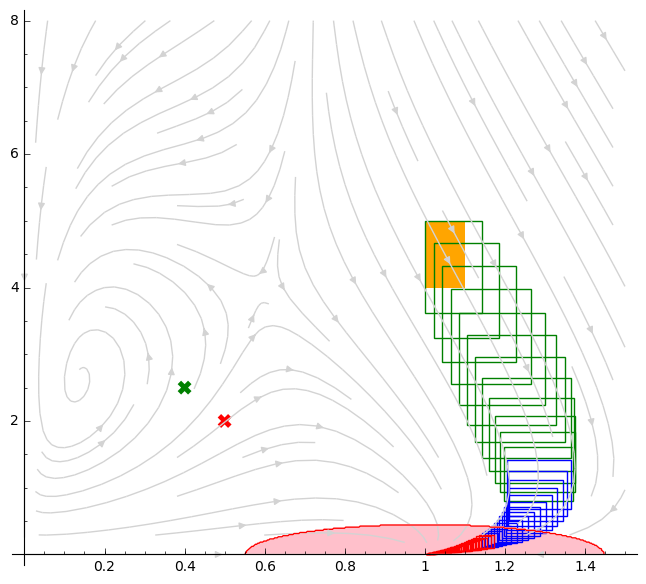

In [10]:
p + reach.sage_interval_plot('x', 'y',
                             poly=(x - 1)^2 + y^2 - 0.2,
                             aspect_ratio='automatic')

In [11]:
roots = reach.roots(P.p, P.dpdt(vf))

In [12]:
[root.str(style='brackets') for root in roots]

['[1.4953025198568667 .. 2.4599999999999920]']

## Context

In [13]:
kwargs = dict(
    order=5, step=0.01,
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=10,
    epsilon_ctx=0.1
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [59]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

Computed 1001 flowpipes in 9.18172502518 sec
Prepared for plotting in 4.55018210411 sec
Computed 21 flowpipes in 0.308846950531 sec
Prepared for plotting in 0.37823009491 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
roots = [[0.00000000000000000 .. 0.21000000000000005]]
0 at 0.201000000000001
Monitored signal 0.0313029289246 sec
sig    = Signal([0.00000000000000000 .. 0.0010000000000000001], [])
sig(0) = None
I  = [0.00000000000000000 .. 10.001000000000000]
fI = ['[0.99999996658286804 .. 1.3805139932507021]', '[0.00055061394130084383 .. 5.0000002572272484]']
C || f(I) = ['[1.0499999665828678 .. 1.4805139932507021]', '[0.00055061394130084383 .. 5.0000002572272484]']
phi(C || f(I)) = None
bisecting [0.00000000000000000 .. 10.001000000000000] -> [0.00000000000000000 .. 5.0004999999999998], [5.0004999999999997 .. 10.001000000000000]
Computed 21 flowpipes in 0.344967126846 sec
Prepared for plotting in 0.366534948349 sec
domain = [0.00000000000000000 .. 0.20100000000000002]
root

limit_output extension: Maximum message size of 10000 exceeded with 10083 characters

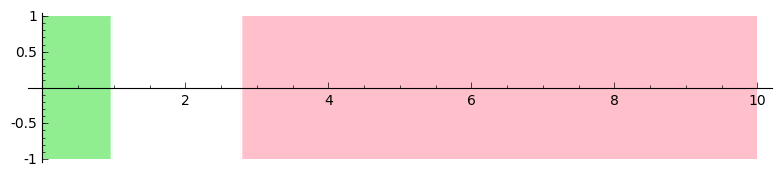

In [60]:
sig.plot()

### Diagnostics

In [16]:
reach = Reach(vf, v3, 7 + 1e-3, **kwargs)

In [17]:
reach.num_flowpipes

701

In [18]:
m = reach(RIF(0, 1) + 0.0)

In [19]:
print('[{}]'.format(", \n ".join(a.str(style='brackets') for a in m)))

[[0.99999996658286804 .. 1.3805139932507018], 
 [1.0587974495393677 .. 5.0000002572272484]]


In [21]:
fm = Poly((x - 1)^2 + y^2 - 0.2)(m)
fm

1.?e2

In [22]:
fm.str(style='brackets')

'[0.54053799976754968 .. 25.180516586224702]'

In [23]:
Q = {x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [24]:
[a.str(style='brackets') for a in Q.context_jump(m)]

['[1.0499999665828678 .. 1.4805139932507019]',
 '[1.0587974495393677 .. 5.0000002572272484]']

In [26]:
Poly((x - 1)^2 + y^2 - 0.2)(Q.context_jump(m)).str(style='brackets')

'[0.51456369608837126 .. 25.254542282545526]'

In [27]:
sig = G(RIF(0,0.2), P).signal_for_system(vf, Q.context_jump(m), 0, **kwargs)
sig

Computed 21 flowpipes in 0.319652080536 sec
Prepared for plotting in 0.31556391716 sec
domain = [0.00000000000000000 .. 0.20000000000000002]
roots = [[0.035150739702498698 .. 0.21000000000000005]]
  J  = [0.00000000000000000 .. 0.035150739702498699]
f(J) = [0.030759755303541247 .. 25.631947887696982]
0 at 0.200000000000001
Monitored signal 0.0640361309052 sec


Signal([0.00000000000000000 .. -0.00000000000000000], [])

In [28]:
sig = P.signal_for_system(vf, Q.context_jump(m), 0.2, **kwargs)
sig

Computed 21 flowpipes in 0.316806077957 sec
Prepared for plotting in 0.304630041122 sec
domain = [0.00000000000000000 .. 0.20000000000000002]
roots = [[0.035150739702498698 .. 0.21000000000000005]]
  J  = [0.00000000000000000 .. 0.035150739702498699]
f(J) = [0.030759755303541247 .. 25.631947887696982]
0 at 0.200000000000001
Monitored signal 0.0616738796234 sec


Signal([0.00000000000000000 .. 0.20000000000000002], [([0.00000000000000000 .. 0.035150739702498699], True)])

In [29]:
rt = RIF(0.00000000000000000, 0.035150739702498699)

In [30]:
reach2 = Reach(vf, Q.context_jump(m), 1, **kwargs)

In [31]:
rts = reach2.roots(P.p, P.dpdt(vf), epsilon=1e-5, verbosity=10)

reached detect roots t=0.0 + [0.0..0.01]
detect_roots(T0=[0.0..0.01], epsilon=1e-05, verbosity=10)
T = [0.0..0.01]
Tfinal = [-0.0..0.00187610394111]
splitting! [0.0..0.01] -> [-0.0..0.00187610394111] + [0.00656882528549..0.01]
detect_roots(T0=[-0.0..0.00187610394111], epsilon=1e-05, verbosity=10)
T = [-0.0..0.00187610394111]
failed! on:
M=[0.000938051970557..0.000938051970557]
extdiv(T=[-0.000938051970557..0.000938051970557], Tu=[0.0..0.0], split=False, T=[-0.000938051970557..0.000938051970557], fI=[0.489850948199..25.2868258534], fP=[-239.824865967..119.921795498])
detect_roots(T0=[0.00656882528549..0.01], epsilon=1e-05, verbosity=10)
T = [0.00656882528549..0.01]
T = [0.00952638099428..0.01]
failed! on:
M=[0.00976319049714..0.00976319049714]
extdiv(T=[-0.00023680950286..0.00023680950286], Tu=[-0.00171558735726..-0.00124196835154], split=False, T=[-0.00023680950286..0.00023680950286], fI=[0.270637426703..25.5908153897], fP=[-246.403625061..123.744270022])
reached detect roots t=0.01 + 

limit_output extension: Maximum message size of 10000 exceeded with 26336 characters

In [32]:
[a.str(style='brackets') for a in rts]

['[0.035150739702498698 .. 1.0000000000000007]']

In [35]:
Poly((x - 1)^2 + y^2 - 0.2)(reach2(rt.center())).str(style='brackets')

'[0.20324932500950576 .. 25.246807493074457]'

In [36]:
reach2.num_flowpipes

100

### Sage eval vs flow* intEval

In [39]:
from flowstar.poly import Poly, index_fn

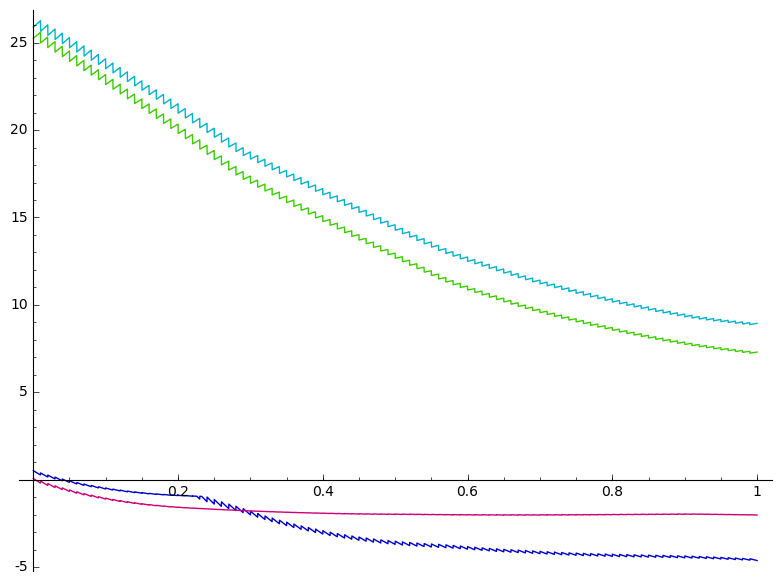

In [41]:
plot((lambda t: Poly(P.p)(reach2(t)).lower(),
      lambda t: Poly(P.p)(reach2(t)).upper(),
      lambda t: index_fn(P.p)(reach2(t)).lower(),
      lambda t: index_fn(P.p)(reach2(t)).upper()),
     (0, 1))

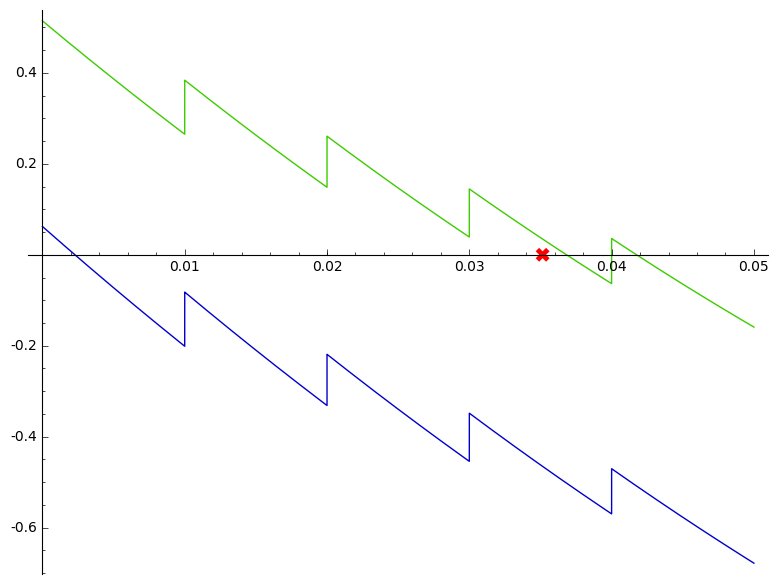

In [46]:
plot(((lambda t: index_fn(P.p)(reach2(t)).lower()),
      (lambda t: Poly(P.p)(reach2(t)).lower())),
      #lambda t: index_fn((x - 1)^2 + y^2 - 0.2)(reach2(t)).upper()),
     (0, 0.05), plot_points=1000)\
 + point((rts[0].lower(), 0), marker='X', size=100, color='red')
# + point((rts[0].upper(), 0), marker='X', size=100, color='green')

In [47]:
import scipy.optimize as opti

In [48]:
opti.minimize_scalar((lambda t: abs(Poly(P.p)(reach2(t)).lower())), (0, float(0.01)))

     fun: 2.04276151549720e-9
    nfev: 34
     nit: 27
 success: True
       x: 0.041747009135030134

In [49]:
opti.minimize_scalar((lambda t: abs(index_fn(P.p)(reach2(t)).lower())), (0, float(0.01)))

     fun: 4.08904021753642e-11
    nfev: 32
     nit: 28
 success: True
       x: 0.002280879572477518

### More manual tests

In [50]:
reach2.result

2

In [51]:
jm = Q.context_jump(m)

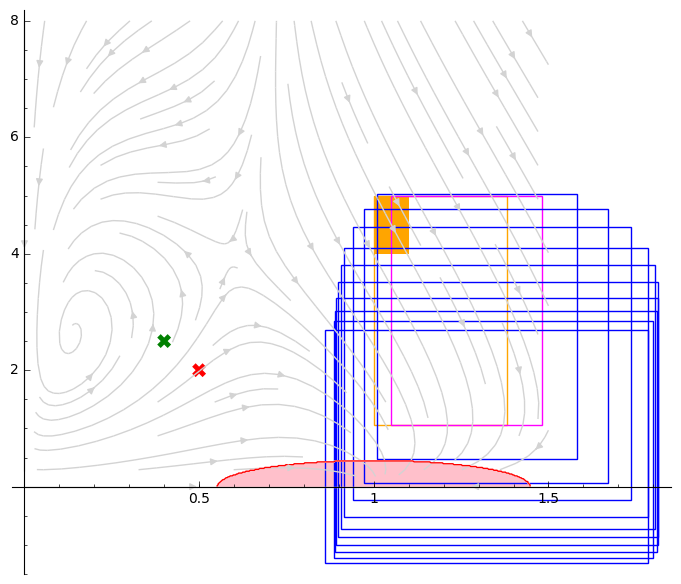

In [52]:
p + polygon([(m[0].lower(), m[1].lower()), (m[0].upper(), m[1].lower()), (m[0].upper(), m[1].upper()), (m[0].lower(), m[1].upper())], aspect_ratio='automatic', fill=None, color='orange') + polygon([(jm[0].lower(), jm[1].lower()), (jm[0].upper(), jm[1].lower()), (jm[0].upper(), jm[1].upper()), (jm[0].lower(), jm[1].upper())], aspect_ratio='automatic', fill=None, color='magenta') + reach2.sage_interval_plot('x', 'y', poly=(x - 1)^2 + y^2 - 0.2, aspect_ratio='automatic')

In [53]:
sig(0)

True

In [54]:
sig = G(RIF(0,0.2), P).signal_for_system(vf, Q.context_jump(m), 2, **kwargs)
sig

FlowstarFailedException: Did not run successfully!
status = 4
num_flowpipes